# TD de machine Learning : Catégorisation musicale

**Elective** : Machine Learning   
**Professeur** : Théophile Ravillion   
**Date** : Vendredi 23 Avril 2021

## Etudiants : FOUR Sébastien, LECOMTE Louis

## Contexte 
Vous travaillez chez Deezer, département Data Science, félicitations.
D'habiles ingénieurs musicologues ont mis au point un jeu de données contenant des informations sur des morceaux de musique. 
Avec quelques transformées de Fourier et autres joyeusetés propres à leur art, ils ont mis au point deux jeux de données contenant de nombreux indicateurs décrivant un morceau de musique.
Ils comptent sur vous pour mettre au point un algorithme capable d'identifier le genre musical d'un morceau sur la base des différents indicateurs qu'ils ont mis au point.
Vous vous apprétiez à leur demander des informations concernant ces variables mais vous constatez qu'ils sont partis en séminaire d'entreprise et que vous vous retrouvez tout seul avec un jeu d'entrainement étiqueté, un jeu de test et un post-it goguenard de votre chef qui vous demande de faire des prédictions précises sur le jeu de test d'ici 16h.

## Votre défi :
Modéliser le problème, construire un modèle et faire une prédiction de la catégorie à laquelle appartient chaque élément du fichier test.csv à l'aide d'un modèle aussi simple et performant que possible.


## Livrable
Un projet github contenant un notebook + un fichier prédictions.csv contenant les prédictions faites sur le jeu de test

En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.
Merci d'utiliser la virgule comme séparateur 

Bonne chance !

# Notre solution :

## Récuperer les données 

In [1]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )

df_test = df_train.category
target = df_test

df_train.drop('category', axis=1, inplace=True)
data = df_train

## Analyser les données  
Identifier la distribution de chaque variable  
Données manquantes    
Données aberrantes   
Données corrélées entre elles  

---------------------------------------------------------------------------
## I - Visualisation des jeux d'entrainement et de test sous la forme d'un dataframe :
### Jeu d'entrainement :

In [2]:
data.describe()

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
count,320.000000,317.000000,317.000000,317.000000,317.000000,318.000000,320.000000,318.000000,319.000000,316.000000,...,314.000000,317.000000,319.000000,318.000000,316.000000,316.000000,320.000000,316.000000,316.000000,317.000000
mean,159.500000,461.223799,727.558402,441.424764,664.515463,420.808596,606.042905,417.116685,605.835885,469.942682,...,0.059404,0.629552,4.917406,28.050904,-0.155241,1.737679,1180.002741,1942.502831,192.060511,115.472340
std,92.520268,302.890638,511.932682,286.127709,507.650090,284.887311,443.484753,269.444492,410.002545,319.000592,...,0.279446,0.170709,2.537782,16.103779,0.185176,1.063592,711.314460,1984.500644,107.853027,53.495612
min,0.000000,52.542076,108.190132,66.789970,129.553772,64.062683,117.359634,50.826832,93.769897,50.655052,...,-0.850446,0.405036,0.366504,1.656318,-0.650820,0.351351,21.491228,41.709451,35.199924,32.996641
25%,79.750000,254.774170,388.372406,248.708359,350.873505,231.128601,344.294373,228.390095,353.000809,258.015579,...,-0.108972,0.515947,3.048645,16.354873,-0.287891,0.958037,687.719298,626.473435,114.992507,78.780289
50%,159.500000,377.393036,571.490845,381.081177,534.109131,340.970337,484.871140,354.934341,505.056274,403.037384,...,0.068480,0.583850,4.731231,24.205491,-0.086321,1.461911,1020.833333,1274.624056,167.636659,104.338107
75%,239.250000,592.239685,910.419189,558.673584,803.034241,506.674622,752.747421,507.147308,702.858398,568.195679,...,0.205802,0.683956,6.615188,37.958948,0.002296,2.144044,1552.741228,2634.940367,240.335595,142.303996
max,319.000000,1643.472900,3421.152100,2172.719482,4360.215332,2302.835205,5054.364258,1829.826904,3210.021484,2502.509033,...,1.985128,1.771815,14.466579,86.371120,0.074635,6.510337,5243.859649,15422.032531,579.817519,406.147341


### Jeu de test :

In [3]:
target.describe()

count    320.000000
mean       1.500000
std        1.119785
min        0.000000
25%        0.750000
50%        1.500000
75%        2.250000
max        3.000000
Name: category, dtype: float64

### Vérification des valaurs manquantes dans la base de données :

In [4]:
data.head(10)

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,...,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std
0,0,866.507629,1585.437134,415.300842,710.790771,683.865845,1011.552856,473.484100,744.247925,304.914825,...,0.156972,0.647313,3.631719,27.621587,-0.186330,1.962404,1525.877193,1579.021838,190.907164,149.482276
1,1,832.956909,2140.568115,287.584564,281.795380,405.467224,754.076904,1061.359863,2263.894531,2502.509033,...,-0.515713,0.575588,6.230564,38.780628,-0.013198,2.139456,1740.789474,1941.791036,257.913214,171.257592
2,2,331.544586,553.657532,260.467499,327.618225,283.580139,312.385986,204.369690,225.922531,286.470215,...,-0.002418,0.837297,4.264771,86.371120,-0.155013,1.336048,5243.859649,15422.032531,508.122337,296.141124
3,3,454.521851,1170.188110,601.021790,1035.021240,721.523865,1861.131836,350.991791,495.942383,432.551971,...,0.257047,0.702976,4.064860,16.844325,-0.287745,2.207420,988.596491,999.051613,144.638374,142.303996
4,4,180.331635,245.818512,388.924744,917.082581,186.856262,192.765305,212.240402,370.108063,170.875610,...,0.212848,0.487534,4.164816,5.764473,-0.626706,1.263404,21.491228,735.051431,181.818928,106.604597
5,5,623.636475,1185.141235,356.477631,438.765228,436.773651,584.193237,519.140076,607.874695,886.185425,...,-0.179700,0.817544,4.731231,33.695191,0.006474,1.644274,1310.964912,753.759663,179.852651,88.762234
6,6,202.341812,289.642334,154.299088,197.096191,175.142578,296.743988,127.823761,150.595825,NaN,...,0.113059,0.497695,3.298534,7.437169,-0.525607,0.579028,214.912281,544.688458,109.475711,37.981397
7,7,680.875793,521.657593,960.918823,1005.877625,722.886108,571.320068,680.045532,527.399902,1036.099731,...,0.384367,0.480489,6.996890,34.279457,-0.004662,2.157810,1031.578947,1667.802139,265.440200,119.720858
8,8,256.068146,419.610474,154.441422,241.447266,192.383408,342.736816,191.470200,264.553986,184.699219,...,0.042138,0.486629,4.233308,10.201029,-0.470241,1.461510,537.280702,1069.792914,135.532742,81.179168
9,9,681.930420,1243.771484,637.555603,874.287659,621.384094,916.178772,472.486176,832.650085,394.936432,...,0.273687,0.601287,5.264327,17.964051,0.002828,1.918716,580.263158,358.190976,113.107438,68.767890


### On remarque que le jeu d'entrainement comporte des cellules vides ce qui necessite l'imputation des valeurs manquante via la fonction KNNImputer : 

`class sklearn.impute.KNNImputer(*, missing_values=nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False)`

### Jeu d'entrainement :

In [5]:
import numpy as np
from sklearn.impute import KNNImputer

train_imputer = KNNImputer(missing_values=np.nan, n_neighbors=2)
data = train_imputer.fit_transform(data)

### Observer une correlation entre les différentes features

<AxesSubplot:>

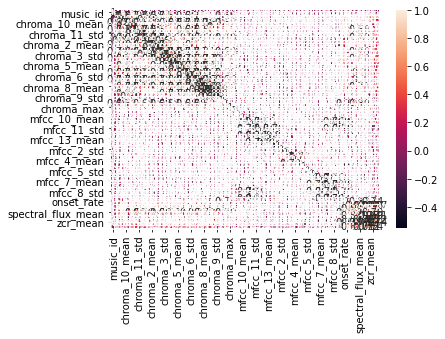

In [15]:
import seaborn as sns
# Observer la corrélation entre les différentes caractéristiques des maisons
correlation_matrix = df_train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

## Normaliser les données
Choisir une méthode de normalisation, comparer les résultats obtenus avec différentes méthodes 

### Boite à outils
  
Robust Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html   
StandardScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler         
MinMaxScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler      

## Banc d'essai :

### Cas du Robust Scaler :

In [16]:
from sklearn.preprocessing import RobustScaler

transformer = RobustScaler().fit(data)
transformer.fit_transform(data)

array([[-1.        ,  1.46376912,  1.94250393, ...,  0.17161545,
         0.18565447,  0.68108725],
       [-0.99373041,  1.36402299,  3.00540352, ...,  0.35497512,
         0.72023561,  1.01383639],
       [-0.98746082, -0.12667358, -0.03302646, ...,  7.1684878 ,
         2.71642963,  2.9221847 ],
       ...,
       [ 0.98746082, -0.13176881, -0.18148892, ..., -0.23494386,
        -0.2556268 , -0.23910573],
       [ 0.99373041,  0.22308671, -0.369126  , ..., -0.21932734,
        -0.0348847 , -0.55243803],
       [ 1.        ,  1.70088384,  1.15985991, ...,  1.09314883,
         1.44946534,  1.69784238]])

### Cas du Standard Scaler :

In [7]:
from sklearn.preprocessing import StandardScaler

data_standardScaler = data
scaler = StandardScaler()
scaler.fit_transform(data_standardScaler)
print(scaler.mean_)
print(scaler.transform(data_standardScaler))

[ 1.59500000e+02  4.60098152e+02  7.25733839e+02  4.40550492e+02
  6.62056997e+02  4.20510103e+02  6.06042905e+02  4.16317627e+02
  6.04794012e+02  4.68853500e+02  7.50621525e+02  4.61318011e+02
  7.05040309e+02  4.73606865e+02  7.16122442e+02  4.64954280e+02
  6.96653391e+02  4.22547733e+02  6.04109791e+02  4.59771206e+02
  6.98259986e+02  4.42088384e+02  6.32254590e+02  4.76534719e+02
  7.23232304e+02  5.47406153e+00  1.26741371e+03  1.34650416e+04
  7.28102430e+00  9.93747819e+00  3.68604822e-02  6.23683871e-01
  1.00762303e-02  6.15114118e-01  1.82515234e-02  6.00904994e-01
  8.37751759e-03  5.98266722e-01 -1.12614763e-02  1.03262274e+00
  2.23473225e-02  8.45217709e-01 -1.10232486e-01  7.02515627e-01
  1.35985996e+00  6.31545531e-01  5.45040554e-02  6.21930558e-01
  3.84699250e-01  6.27784648e-01  5.71916980e-03  6.32624018e-01
  6.29523939e-02  6.29483170e-01  4.91557456e+00  2.80093290e+01
 -1.53701356e-01  1.74491446e+00  1.18000274e+03  1.92891085e+03
  1.91926473e+02  1.15746

### Cas du Min Max Scaler :

In [8]:
from sklearn.preprocessing import MinMaxScaler

data_min_max = data
scaler = MinMaxScaler()
scaler.fit_transform(data_min_max)
print(scaler.data_max_)
print(scaler.transform(data_min_max))

[3.19000000e+02 1.64347290e+03 3.42115210e+03 2.17271948e+03
 4.36021533e+03 2.30283521e+03 5.05436426e+03 1.82982690e+03
 3.21002148e+03 2.50250903e+03 6.41828711e+03 1.87320996e+03
 4.36132520e+03 1.81836414e+03 3.70467383e+03 2.42418848e+03
 3.89075830e+03 1.76127551e+03 4.33818213e+03 1.93733643e+03
 3.35344238e+03 2.29372314e+03 5.15900439e+03 3.72827637e+03
 6.85694678e+03 6.99721541e+00 4.74575439e+03 5.75402305e+04
 1.58105865e+02 1.36697108e+01 1.19416368e+00 1.19769526e+00
 4.77022886e-01 1.42137325e+00 8.73670518e-01 1.45657599e+00
 8.95387173e-01 1.33677113e+00 5.02933264e-01 1.85857177e+00
 6.99341476e-01 1.57894182e+00 2.13769388e+00 1.34518802e+00
 2.64263439e+00 1.30243587e+00 1.16444147e+00 1.39804029e+00
 1.42336869e+00 1.66366768e+00 8.67235065e-01 1.31757641e+00
 1.98512757e+00 1.77181458e+00 1.44665792e+01 8.63711201e+01
 7.46354640e-02 6.51033735e+00 5.24385965e+03 1.54220325e+04
 5.79817519e+02 4.06147341e+02]
[[0.         0.5116285  0.44589917 ... 0.09995319 0.2

## Etudier l’opportunité d’une réduction de dimension
- Tester les perfs obtenus pour différentes valeurs
- Visualiser la variance expliquée par chaque axe
- Justifier le nombre d’axes retenus

### Boite à outils  
Analyse en composante principale : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html   

In [9]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(data)
print(pca.explained_variance_ratio_.sum())

0.9520489585234456


## Créer un échantillon non biaisé de validation
A moins que vous n'utilisiez la k-fold validation (stratifiée ?)

### Boite à outil :   
`from sklearn.model_selection import train_test_split`  

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

## Entrainer différents algorithmes de classification

`model = ...`   
`model.fit(X_train, y_train)`

### Boite à outils  
SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html   
Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier   
Regression logistique : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html   

## Cas du SVM (SVC) :

In [28]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

model_SVC = make_pipeline(StandardScaler(), SVC(gamma='auto'))
model_SVC.fit(x_train, y_train)
print(model_SVC.score(x_train, y_train))
print(model_SVC.predict([[0, 1, 2, 3]]))

0.955
[1]


## Cas du Random Forest Classifier :

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

x_train, y_train = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)

model_RFC = RandomForestClassifier(max_depth=2, random_state=0)
model_RFC.fit(x_train, y_train)
print(model_RFC.score(x_train, y_train))
print(model_RFC.predict([[0, 1, 2, 3]]))

0.946
[1]


## Cas de la Regression Logistique :

In [30]:
from sklearn.linear_model import LogisticRegression
model_RL = LogisticRegression(random_state=0).fit(x_train, y_train)
print(model_RL.score(x_train, y_train))
print(model_RL.predict([[0, 1, 2, 3]]))

0.948
[1]


### Nous pouvons contater que le score du SVC est sensiblement plus elevé que les deux autres algorithmes de classification

## Comparer la performance de différents algorithmes
Faire des prédictions et evaluer leur justesse de ces prédictions à l'aide de différents indicateurs :
- Matrice de confusion
- Accuracy
- F-Score

### Boite à outils  
Un rapport de performance clé en main : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html   

Liste des différents indicateurs : https://scikit-learn.org/stable/modules/model_evaluation.html

Faire une prédiction avec un model sklearn entrainé :
`y_pred_1 = model_1.predict(X_val, y_val)`   





### Rapport de performance :

In [ ]:
from sklearn.metrics import classification_report


### Accuracy Score :

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(x_train, y_train)


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

## Optimiser les hyper-paramètres de l’algorithme retenu
Tester différents hyper-paramètres pour tirer au mieux partit de l'algorithme retenu

### Boite à outils  
GridSearchCV :  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [31]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
model = GridSearchCV(svc, parameters)
model.fit(data, target)

## Prédire des valeurs pour le jeu de test 
Créer un fichier au format .csv contenant  vos prédictions.
En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.

Vérifier que votre notebook fonctionne avant de le rendre 

### Boite à outils  
exporter un dataFrame pandas au format csv :
`df_test.to_csv('data/test.csv' , sep=',', decimal='.')`

In [ ]:
target.to_csv('')